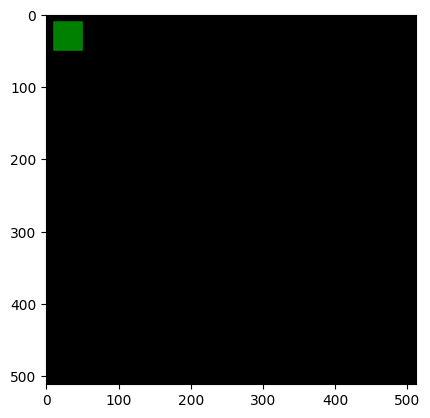

In [8]:
from PIL import Image, ImageDraw
import numpy as np
from matplotlib import pyplot as plt

def get_color_map_list(num_classes):
    num_classes += 1
    color_map = num_classes * [0, 0, 0]
    for i in range(0, num_classes):
        j = 0
        lab = i
        while lab:
            color_map[i * 3] |= (((lab >> 0) & 1) << (7 - j))
            color_map[i * 3 + 1] |= (((lab >> 1) & 1) << (7 - j))
            color_map[i * 3 + 2] |= (((lab >> 2) & 1) << (7 - j))
            j += 1
            lab >>= 3
    color_map = color_map[3:]
    color_map[:3] = [0, 0, 0]
    return color_map

mask = np.zeros((512, 512), dtype=np.uint8)
mask = Image.fromarray(mask)
draw = ImageDraw.Draw(mask)
draw.rectangle(((10, 10), (50, 50)), fill=1, outline=1, width=1)
color_map = get_color_map_list(256)
mask.putpalette(color_map)
plt.imshow(mask)
mask.save('mask.png')